In [2]:
from matplotlib import pyplot as plt
import numpy as np
import random

Dice

(array([1., 2., 3., 4., 5., 6., 5., 4., 3., 2., 1.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 [<matplotlib.patches.Polygon at 0x11ea4f340>])

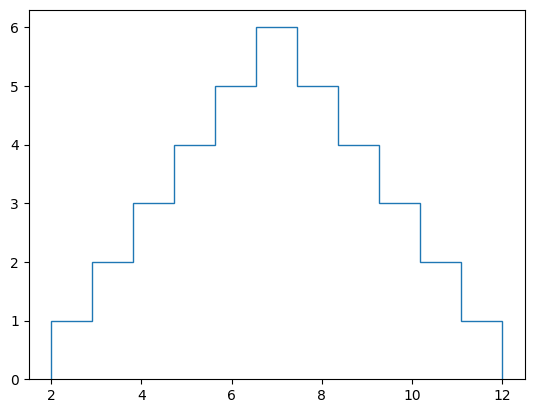

In [3]:
# dice combinations for 2 dice
dice_combinations = [(i, j) for i in range(1, 7) for j in range(1, 7)]
# sum these combinations
dice_sums = [sum(combination) for combination in dice_combinations]
plt.hist(dice_sums, bins=11, histtype='step', label=f"2 dice")


(array([ 1.,  3.,  6., 10., 15., 21., 25., 27.,  0., 27., 25., 21., 15.,
        10.,  6.,  3.,  1.]),
 array([ 3.        ,  3.88235294,  4.76470588,  5.64705882,  6.52941176,
         7.41176471,  8.29411765,  9.17647059, 10.05882353, 10.94117647,
        11.82352941, 12.70588235, 13.58823529, 14.47058824, 15.35294118,
        16.23529412, 17.11764706, 18.        ]),
 [<matplotlib.patches.Polygon at 0x11eb3c190>])

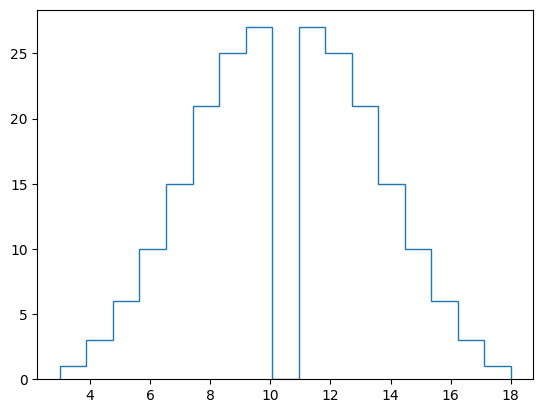

In [4]:
# dice combinations for 3 dice
dice_combinations = [(i, j, k) for i in range(1, 7) for j in range(1, 7) for k in range(1, 7)]
# sum these combinations
dice_sums = [sum(combination) for combination in dice_combinations]
plt.hist(dice_sums, bins=17, histtype='step', label=f"3 dice")

In [5]:
# Generalised dice combinations for n dice
def count_ways_to_make_sum_with_dice(dice_count, expected_sum):
    if expected_sum < dice_count or expected_sum > 6 * dice_count:
        return 0
    if dice_count == 1:
        return 1
    return sum(count_ways_to_make_sum_with_dice(dice_count - 1, expected_sum - i)
               for i in range(1, 7))


In [6]:
count_ways_to_make_sum_with_dice(2, 1)

0

In [7]:
count_ways_to_make_sum_with_dice(2, 2)

1

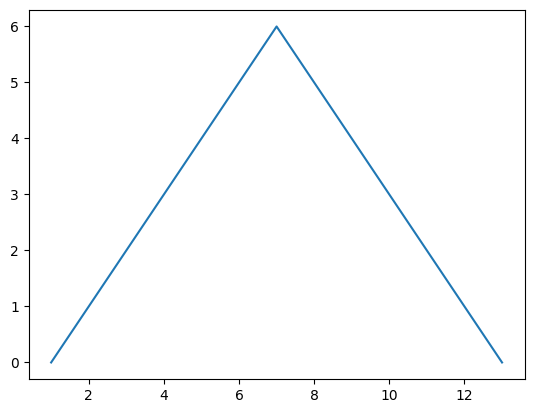

In [8]:
dice_sums = [count_ways_to_make_sum_with_dice(2, i) for i in range(1, 14)]
plt.plot(np.arange(1, 14), dice_sums, label=f"2 dice")


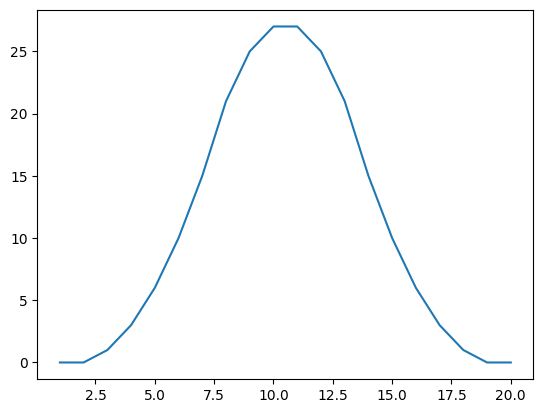

In [9]:
n = 3
dice_sums = [count_ways_to_make_sum_with_dice(n, i) for i in range(1, n*7)]
plt.plot(np.arange(1, n*7), dice_sums, label=f"{n} dice")

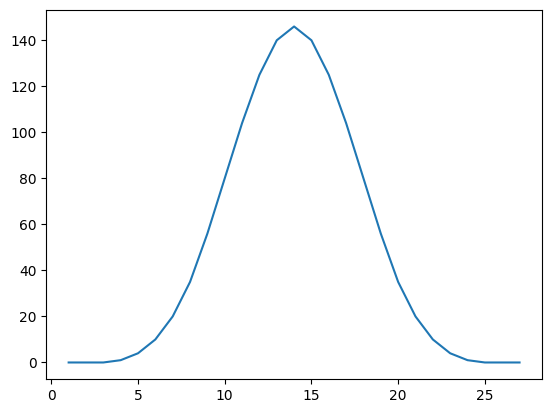

In [10]:
n = 4
dice_sums = [count_ways_to_make_sum_with_dice(n, i) for i in range(1, n*7)]
plt.plot(np.arange(1, n*7), dice_sums, label=f"{n} dice")

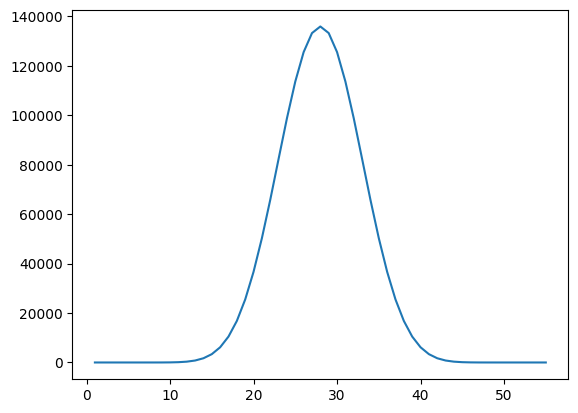

In [11]:
n = 8
dice_sums = [count_ways_to_make_sum_with_dice(n, i) for i in range(1, n*7)]
plt.plot(np.arange(1, n*7), dice_sums, label=f"{n} dice")

In [12]:
population_size = 100000
def make_uniform_series_plot(n):
    uniform_series = np.array(
        [sum(random.uniform(0, 1) for _ in range(n))/n for _ in range(population_size)])
    plt.hist(uniform_series, bins=200, histtype='step', label=f"n={n}")

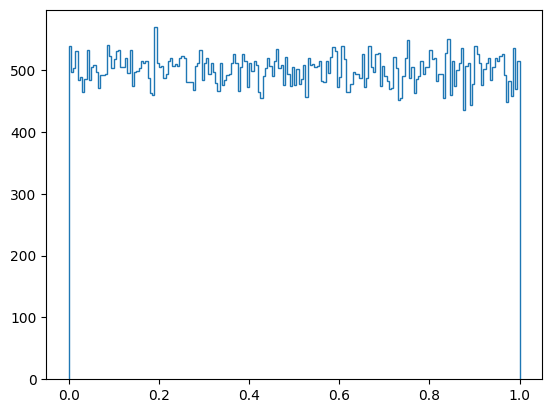

In [13]:
make_uniform_series_plot(1)

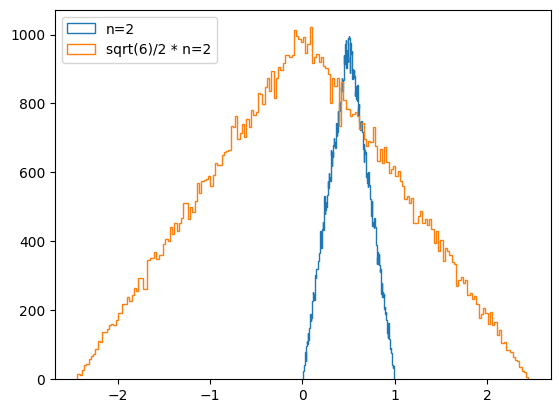

In [14]:
make_uniform_series_plot(2)
n=2
uniform_series = np.array(
        [sum(random.uniform(-1, 1) for _ in range(n)) * (np.sqrt(6)/ 2) for _ in range(population_size)])
plt.hist(uniform_series, bins=200, histtype='step', label=f"sqrt(6)/2 * n={n}")
plt.legend()

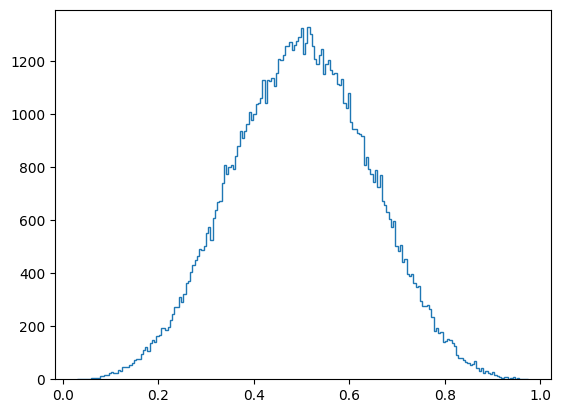

In [15]:
make_uniform_series_plot(4)

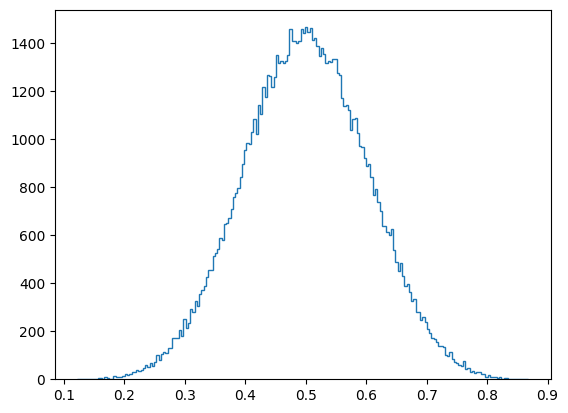

In [16]:
make_uniform_series_plot(8)

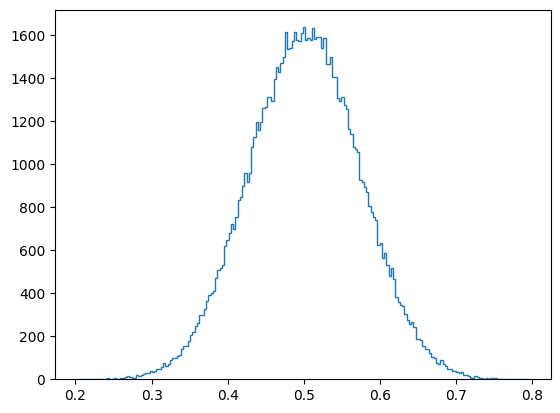

In [17]:
make_uniform_series_plot(16)

Text(0, 0.5, 'Frequency')

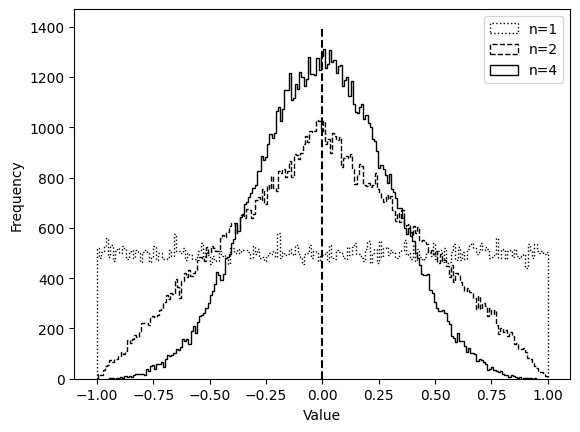

In [24]:
def make_uniform_series_plot_around_0(n, linestyle):
    uniform_series = np.array(
        [sum(random.uniform(-1, 1) for _ in range(n))/n for _ in range(population_size)])
    plt.hist(uniform_series, bins=200, histtype='step', label=f"n={n}", linestyle=linestyle, color='black')
make_uniform_series_plot_around_0(1, 'dotted')
make_uniform_series_plot_around_0(2, 'dashed')
make_uniform_series_plot_around_0(4, 'solid')
plt.vlines([0], [0], [1400], linestyles='dashed', colors='black')
# sl = 1/np.sqrt(6)
# plt.vlines([-sl, sl], [0, 0], [1400, 1400], linestyles='dotted', colors='red')
plt.legend()
plt.gca().set_xlabel("Value")
plt.gca().set_ylabel("Frequency")

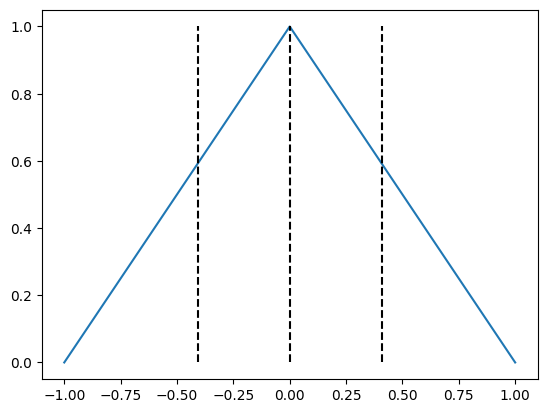

In [20]:
x = np.linspace(-1, 1, 101)
def get_triangle_pdf(x, a=-1, b=1, c=0):
    return np.where(x < c, (x - a) / (c - a), (b - x) / (b - c))

plt.plot(x, get_triangle_pdf(x))
plt.vlines([0, -1/np.sqrt(6), 1/np.sqrt(6)], [0, 0, 0], [1, 1, 1], linestyles='dashed', colors='black')

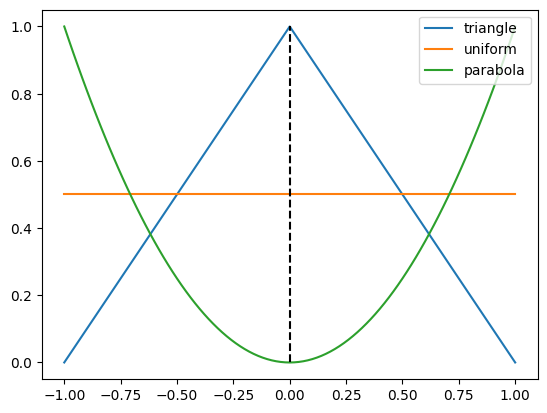

In [ ]:
x = np.linspace(-1, 1, 101)
def get_symmetric_triangle_pdf(x, b=1, c=0):
    return ((b - c) - np.abs(x - c))/ ((b - c)**2)

plt.plot(x, get_symmetric_triangle_pdf(x), label='triangle')
plt.plot(x, np.full(x.shape, 0.5), label='uniform')
plt.plot(x, (x)**2, label='parabola')
plt.legend()
plt.vlines(0, 0, 1, linestyles='dashed', colors='black')
# plt.vlines([0, -1/np.sqrt(6), 1/np.sqrt(6)], [0, 0, 0], [1, 1, 1], linestyles='dashed', colors='black')

In [ ]:
import math
# Draw the probability distribution for the sum of four random variables divided by 4
x = np.linspace(-1, 1, 101)
# y is the probability density function for the sum of four random variables divided by 4
# each point is the probability of U1 + U2 + U3 + U4 = x
y = 1/math.factorial(3) * sum((-1)**k _ for k in range(4))